<h2 style="font-family: Arial, sans-serif; color:rgb(112, 171, 231); font-size: 50px"><b>But de ce Notebook</b></h2>
<p style="font-family: Arial, sans-serif; font-size: 20px; color: white;">
Dans ce notebook, nous définirons la notion de sinistralité et construirons une base de données répertoriant la sinistralité annuelle, région par région, de 2020 à 2024.
</p>

<h2 style="font-family: Arial, sans-serif; color:rgb(112, 171, 231); font-size: 20px">Définition de la sinistralité</h2>

<p style="font-family: Arial, sans-serif; font-size: 20px; color:white;">
En nous inspirant de la bibliographie 2 dans le dossier bibliographies, nous définissons le ratio de sinistralité de la façon suivante:</p>

$$
\text{dérive de sinistralité(N/N-1, Mois M, région R)} = \frac{RAC_{N, M, R}}{RAC_{N-1, M, R}} -1\\

\text{où $RAC_{N, M, R}$ est le reste à charge par personne à l'année N, le mois M et au sein de la région R.}\\

\text{et $RAC_{N-1, M, R}$ est le reste à charge par personne à l'année N-1, le mois M et au sein de la région R.}
$$



<h2 style="font-family: Arial, sans-serif; color:rgb(112, 171, 231); font-size: 20px">Dictionnaires nécessaires</h2>

In [1]:
region_mapping = {
    5: "Régions et Départements d'outre-mer",
    11: "Ile-de-France",
    24: "Centre-Val-de-Loire",
    27: "Bourgogne-Franche-Comté",
    28: "Normandie",
    32: "Hauts-de-France",
    44: "Grand Est",
    52: "Pays de la Loire",
    53: "Bretagne",
    75: "Nouvelle-Aquitaine",
    76: "Occitanie",
    84: "Auvergne-Rhône-Alpes",
    93: "Provence-Alpes-Côte d'Azur et Corse"
}

<h2 style="font-family: Arial, sans-serif; color:rgb(112, 171, 231); font-size: 20px">Importation des librairies nécessaires</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from utils import get_demography_data_by_sexe_age_region
warnings.simplefilter('ignore', category=UserWarning)


<h2 style="font-family: Arial, sans-serif; color:rgb(112, 171, 231); font-size: 20px">Chargement des données et leurs visualisations</h2>

In [ ]:
df = pd.read_csv("./DBs/RAC_data.csv")

Aperçu des données

In [30]:
df.head()

,SOI_ANN,SOI_MOI,BEN_SEX_COD,AGE_BEN_SNDS,BEN_RES_REG,RAC,FLT_PAI_MNT,FLT_REM_MNT
0,2019.0,1.0,0.0,80.0,11.0,1.834800e+02,4.783700e+02,2.948900e+02
1,2019.0,1.0,0.0,99.0,24.0,2.160000e+00,6.330000e+00,4.170000e+00
2,2019.0,1.0,1.0,0.0,5.0,6.420756e+06,2.080076e+07,1.438001e+07
3,2019.0,1.0,1.0,0.0,11.0,4.539699e+07,1.242253e+08,7.882833e+07
4,2019.0,1.0,1.0,0.0,24.0,7.426971e+06,2.037683e+07,1.294986e+07


Changement de types et extraction des mois et de l'année

In [31]:
df = df.astype({
    'AGE_BEN_SNDS': 'int32',
    'BEN_SEX_COD': 'int32',
    'BEN_RES_REG': 'int32',
    'SOI_ANN': 'int32',
    'SOI_MOI': 'int32'
})
df.head()

,SOI_ANN,SOI_MOI,BEN_SEX_COD,AGE_BEN_SNDS,BEN_RES_REG,RAC,FLT_PAI_MNT,FLT_REM_MNT
0,2019,1,0,80,11,1.834800e+02,4.783700e+02,2.948900e+02
1,2019,1,0,99,24,2.160000e+00,6.330000e+00,4.170000e+00
2,2019,1,1,0,5,6.420756e+06,2.080076e+07,1.438001e+07
3,2019,1,1,0,11,4.539699e+07,1.242253e+08,7.882833e+07
4,2019,1,1,0,24,7.426971e+06,2.037683e+07,1.294986e+07


<h2 style="font-family: Arial, sans-serif; color:rgb(112, 171, 231); font-size: 20px">Filtrage des données</h2>

On renomme les colonnes et on ne garde que les données agrégés mensuellement

In [32]:

df.rename(columns = {'SOI_ANN':'annee', 'SOI_MOI':'mois','AGE_BEN_SNDS': 'age', 'BEN_RES_REG': 'region', 'BEN_SEX_COD': 'sexe', 'FLT_PAI_MNT': 'PAI', 'FLT_REM_MNT': 'REM'}, inplace = True)

df['region'] = df['region'].map(region_mapping)


df_grouped = df.drop(columns = ['PAI', 'REM', 'age', 'sexe']).groupby(by = ['annee', 'mois', 'region']).sum()

df_grouped.reset_index(inplace=True)

df_grouped = df_grouped[df_grouped['annee'] >= 2019]

df_grouped


,annee,mois,region,RAC
0,2019,1,Auvergne-Rhône-Alpes,3.776259e+08
1,2019,1,Bourgogne-Franche-Comté,1.217064e+08
2,2019,1,Bretagne,1.316081e+08
3,2019,1,Centre-Val-de-Loire,1.102300e+08
4,2019,1,Grand Est,2.910530e+08
...,...,...,...,...
931,2024,12,Nouvelle-Aquitaine,2.111548e+08
932,2024,12,Occitanie,2.130445e+08
933,2024,12,Pays de la Loire,1.226907e+08
934,2024,12,Provence-Alpes-Côte d'Azur et Corse,2.167067e+08


<h2 style="font-family: Arial, sans-serif; color:rgb(112, 171, 231); font-size: 20px">Importation des données démographiques </h2>

In [33]:
years = np.append(np.array([2018]), df_grouped['annee'].unique())
year_population_dataframes = {}
for year in years:
    # Chargement des données démographiques pour chaque année en utilisant la fonction importée
    year_population_dataframes[year] = get_demography_data_by_sexe_age_region.load_demography_data(year)
    
    # Renommage des colonnes pour correspondre au format du dataframe principal
    year_population_dataframes[year].rename(columns={'Région': 'region', 'Annee': 'annee', 'Population': 'population'}, inplace=True)
    
    # Agrégation des données par année et région en sommant les populations
    # On supprime les colonnes 'Sexe' et 'Tranche d'âge' qui ne sont pas nécessaires pour cette analyse
    year_population_dataframes[year] = year_population_dataframes[year].drop(columns=['Sexe', 'Tranche d\'âge']).groupby(by=['annee', 'region']).sum().reset_index() 


Interpolation mensuelle des données démographiques par région

In [34]:
def interpolate_population(data_1, data_2):
    # Copier les données des deux années pour éviter de modifier les originaux
    df_year_1 = data_1.copy()
    df_year_2 = data_2.copy()
    
    # Calculer la différence annuelle de population et la diviser par 12 pour obtenir les incréments mensuels
    difference_yearly_pop = ((df_year_2['population'] - df_year_1['population']) / 12).to_list()
    
    # Créer une liste des populations interpolées mensuellement
    df_year_2['monthly_population'] = [
        [df_year_1['population'].iloc[i] + j * difference_yearly_pop[i] for j in range(1, 13)]
        for i in range(len(df_year_1))
    ]
    df_year_2['mois'] = list(range(1, 13) for _ in range(len(df_year_1))) 
    
    # Transformer les listes en lignes individuelles
    df_year_2 = df_year_2.explode(['monthly_population', 'mois']).reset_index(drop=True)

    # Supprimer la colonne 'population' car elle n'est plus nécessaire
    df_year_2.drop(columns=['population'], inplace=True)

    # Trier les données par année et mois
    df_year_2.sort_values(by=['annee', 'mois'])

    return df_year_2

# Interpoler les données pour toutes les années disponibles
def interpolate_all_data(data):
    all_data = {}
    for year in sorted(data.keys())[:-1]: 
        # Récupérer les données de deux années consécutives
        data_1 = year_population_dataframes[year]
        data_2 = year_population_dataframes[year + 1]
        # Interpoler les données entre ces deux années
        all_data[year + 1] = interpolate_population(data_1, data_2)
    
    # Combiner toutes les données interpolées en un seul DataFrame
    return pd.concat(all_data.values())[['annee', 'mois', 'region', 'monthly_population']]

# Appliquer l'interpolation à toutes les données démographiques
all_data = interpolate_all_data(year_population_dataframes)
all_data


,annee,mois,region,monthly_population
0,2019,1,Auvergne-Rhône-Alpes,7241321.1
1,2019,2,Auvergne-Rhône-Alpes,7243999.8
2,2019,3,Auvergne-Rhône-Alpes,7246678.5
3,2019,4,Auvergne-Rhône-Alpes,7249357.2
4,2019,5,Auvergne-Rhône-Alpes,7252035.9
...,...,...,...,...
151,2024,8,Régions et Départements d'outre-mer,2025291.3
152,2024,9,Régions et Départements d'outre-mer,2026041.3
153,2024,10,Régions et Départements d'outre-mer,2026791.3
154,2024,11,Régions et Départements d'outre-mer,2027541.3


Fusion des données de l'Open Damir avec les données démographiques

In [47]:
# on va merge les dataframes

copied_df = df_grouped.copy()

# Merge les dataframes sur 'annee', 'age', et 'sexe'.
final_df = copied_df.merge(all_data, how = 'right', on= ['annee', 'mois', 'region'], suffixes=('', '_new'))

final_df['monthly_population'] = final_df['monthly_population'].astype(float) * 0.9 # approximativement 90% des rançais sont assurés par la SS

final_df['RAC'] = final_df['RAC'].astype(float)


final_df['RAC_par_personne'] = final_df['RAC'] / final_df['monthly_population'] 

final_df.sort_values(by = ['annee', 'mois', 'region'])

final_df


,annee,mois,region,RAC,monthly_population,RAC_par_personne
0,2019,1,Auvergne-Rhône-Alpes,3.776259e+08,6517188.99,57.943072
1,2019,2,Auvergne-Rhône-Alpes,3.543708e+08,6519599.82,54.354680
2,2019,3,Auvergne-Rhône-Alpes,4.103594e+08,6522010.65,62.919161
3,2019,4,Auvergne-Rhône-Alpes,3.698999e+08,6524421.48,56.694670
4,2019,5,Auvergne-Rhône-Alpes,3.724364e+08,6526832.31,57.062352
...,...,...,...,...,...,...
931,2024,8,Régions et Départements d'outre-mer,8.695613e+07,1822762.17,47.705691
932,2024,9,Régions et Départements d'outre-mer,9.523380e+07,1823437.17,52.227630
933,2024,10,Régions et Départements d'outre-mer,9.731752e+07,1824112.17,53.350625
934,2024,11,Régions et Départements d'outre-mer,8.117401e+07,1824787.17,44.484098


<h2 style="font-family: Arial, sans-serif; color:rgb(112, 171, 231); font-size: 20px">Visualisation du reste à charge par région</h2>

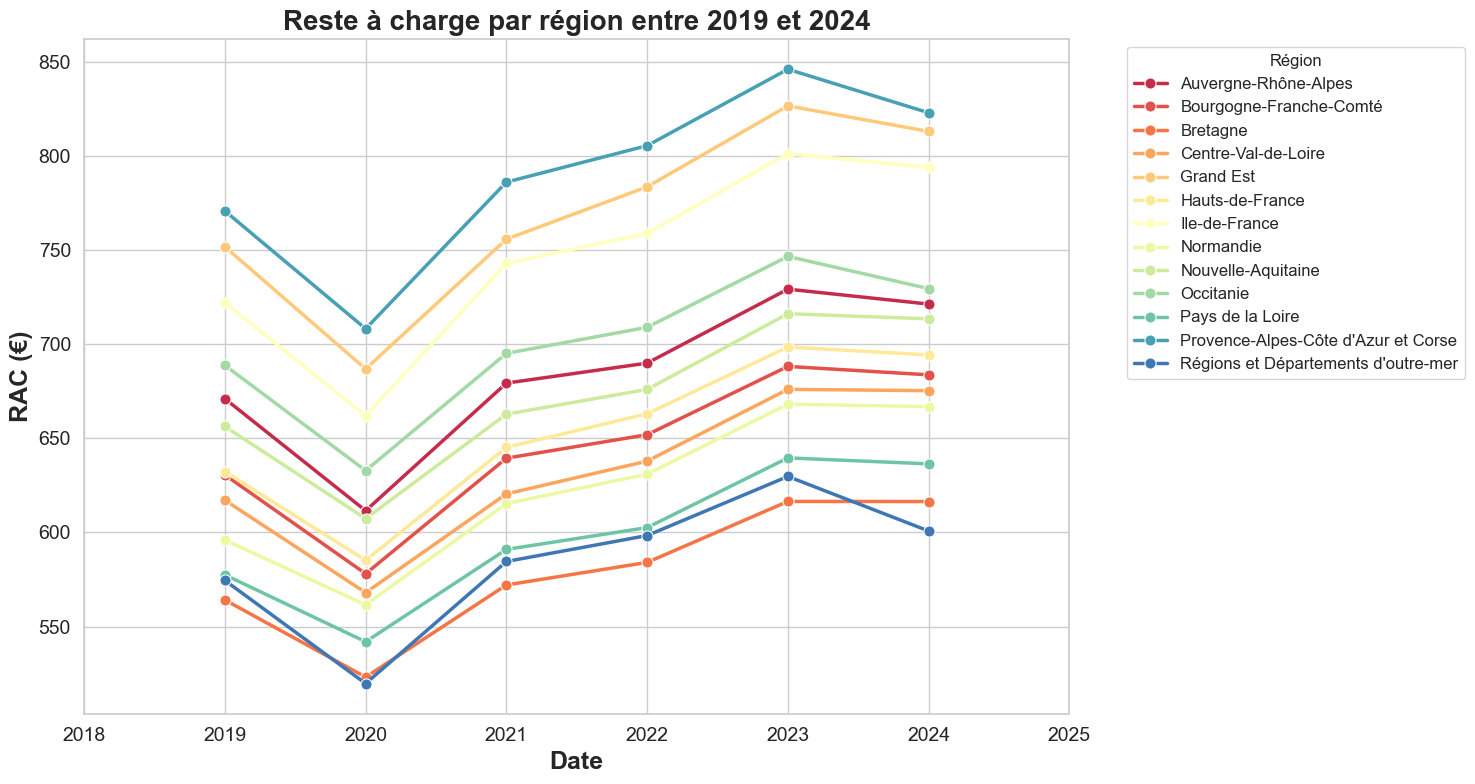

In [48]:
# Définir le style de la visualisation
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# Tracer une courbe pour visualiser le reste à charge (RAC) par région entre 2019 et 2024
sns.lineplot(
    x="annee",  # Axe des x : années
    y="RAC_par_personne",  # Axe des y : reste à charge (RAC)
    data=final_df,  # Données utilisées pour la visualisation
    hue="region",  # Différencier les courbes par région
    marker='o',  # Ajouter des marqueurs pour chaque point
    markersize=8,  # Taille des marqueurs
    linewidth=2.5,  # Épaisseur des lignes
    errorbar=None,  # Pas de barres d'erreur
    estimator=np.sum,  # Estimation basée sur la somme des valeurs
    palette="Spectral"  # Palette de couleurs pour différencier les régions
)

# Ajouter un titre avec une taille de police plus grande
plt.title("Reste à charge par région entre 2019 et 2024", fontsize=20, fontweight='bold')

# Ajouter des étiquettes aux axes avec une taille de police plus grande
plt.xlabel("Date", fontsize=18, fontweight='bold')
plt.ylabel("RAC (€)", fontsize=18, fontweight='bold')

# Ajuster la taille des ticks des axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Ajuster les limites de l'axe des x pour inclure les années de 2018 à 2025
plt.xlim(2018, 2025)

# Placer la légende en dehors du graphique
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Région", fontsize=12)

# Ajuster la disposition pour éviter le chevauchement
plt.tight_layout()

# Afficher le graphique
plt.show()



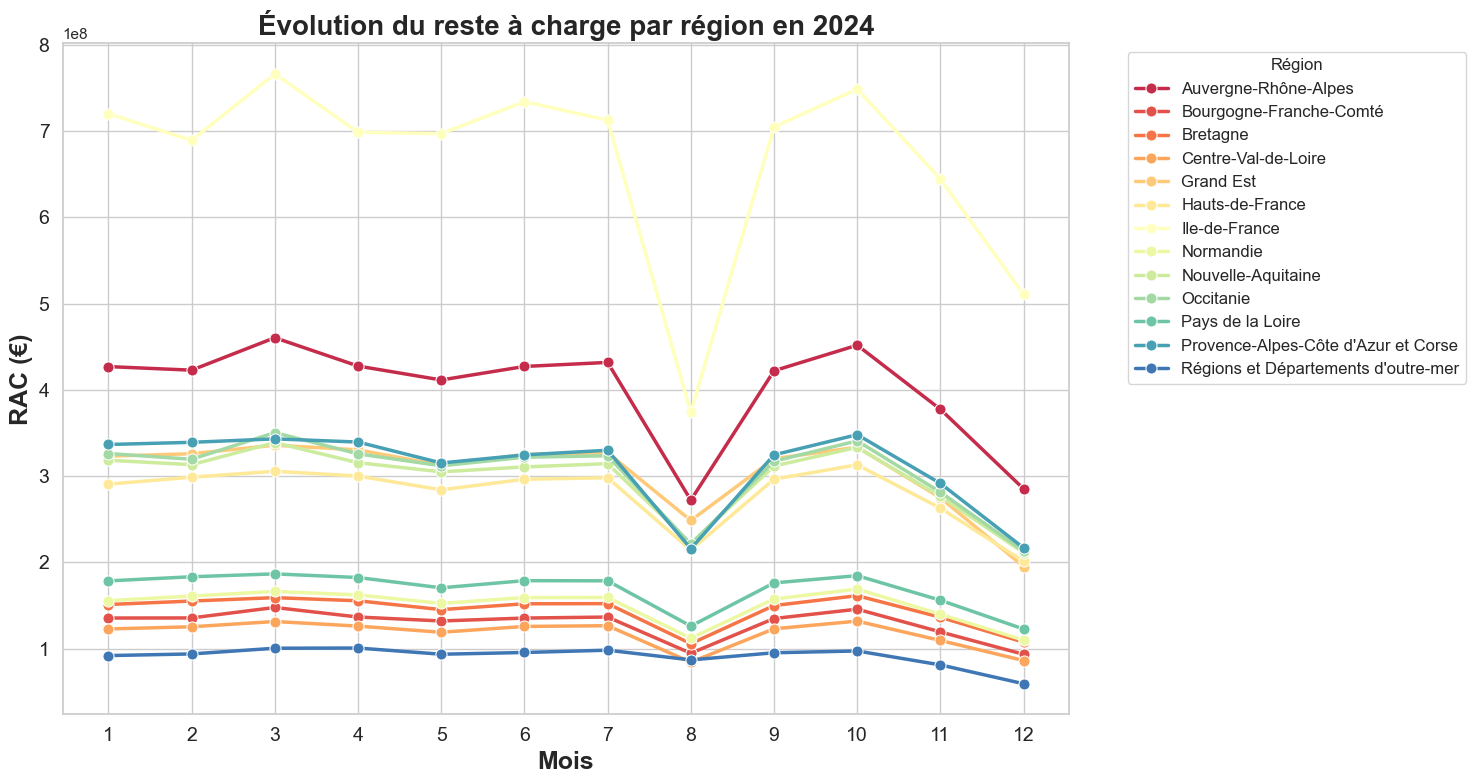

In [51]:
# Filtrer les données pour l'année 2024
final_df_2024 = final_df[final_df['annee'] == 2024]

# Définir le style de la visualisation
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# Tracer une courbe pour visualiser l'évolution du reste à charge (RAC) par région en 2024
sns.lineplot(
    x="mois",  # Axe des x : mois
    y="RAC",  # Axe des y : reste à charge (RAC)
    data=final_df_2024,  # Données utilisées pour la visualisation
    hue="region",  # Différencier les courbes par région
    marker='o',  # Ajouter des marqueurs pour chaque point
    markersize=8,  # Taille des marqueurs
    linewidth=2.5,  # Épaisseur des lignes
    errorbar=None,  # Pas de barres d'erreur
    estimator=np.sum,  # Estimation basée sur la somme des valeurs
    palette="Spectral"  # Palette de couleurs pour différencier les régions
)

# Ajouter un titre avec une taille de police plus grande
plt.title("Évolution du reste à charge par région en 2024", fontsize=20, fontweight='bold')

# Ajouter des étiquettes aux axes avec une taille de police plus grande
plt.xlabel("Mois", fontsize=18, fontweight='bold')
plt.ylabel("RAC (€)", fontsize=18, fontweight='bold')

# Ajuster la taille des ticks des axes
plt.xticks([i for i in range(1, 13)], fontsize=14)  # Mois de 1 à 12
plt.yticks(fontsize=14)

# Placer la légende en dehors du graphique
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Région", fontsize=12)

# Ajuster la disposition pour éviter le chevauchement
plt.tight_layout()

# Afficher le graphique
plt.show()



<h2 style="font-family: Arial, sans-serif; color:rgb(112, 171, 231); font-size: 20px">Calcul du champ de la dérive de sinistralité</h2>

In [50]:
# Filter data for years 2019 to 2023
final_df_N_1 = final_df[(final_df['annee'] <= 2023) & (final_df['annee'] >= 2019)].reset_index(drop=True)

# Filter data for years 2020 and beyond
final_df_N = final_df[final_df['annee'] >= 2020].reset_index(drop=True)

# Ensure both DataFrames have the same length
min_length = min(len(final_df_N), len(final_df_N_1))
final_df_N = final_df_N.iloc[:min_length]
final_df_N_1 = final_df_N_1.iloc[:min_length]

# Calculate the SIN_N/N-1 ratio
final_df_N['SIN_N/N-1'] = final_df_N['RAC_par_personne'].to_numpy() / final_df_N_1['RAC_par_personne'].to_numpy() - 1

# Drop unnecessary columns
final_df_N = final_df_N.drop(columns=['RAC', 'monthly_population', 'RAC_par_personne'])

# Display the resulting DataFrame
SIN_df = final_df_N.copy()

SIN_df.head()

,annee,mois,region,SIN_N/N-1
0,2020,1,Auvergne-Rhône-Alpes,-0.035770
1,2020,2,Auvergne-Rhône-Alpes,0.073834
2,2020,3,Auvergne-Rhône-Alpes,-0.378975
3,2020,4,Auvergne-Rhône-Alpes,-0.691047
4,2020,5,Auvergne-Rhône-Alpes,-0.302549


Text(0.5, 1.0, 'Histogramme des données de la dérive de sinistralité')

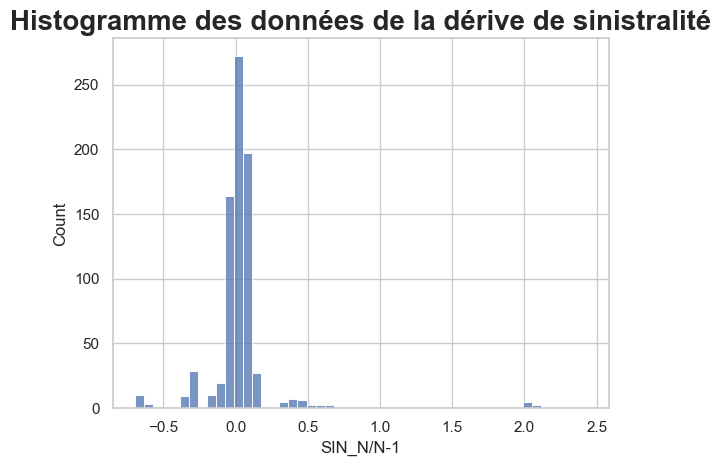

In [39]:
sns.histplot(SIN_df['SIN_N/N-1'], bins = 50)
plt.title('Histogramme des données de la dérive de sinistralité', fontdict={"fontweight": "bold", "fontsize" : "20"})

**Remarque:** On remarque un mode positif, ce qui affirme le fait que les prix des soins augmentent d'années en années.

In [44]:
SIN_df['SIN_N/N-1'].mean()

np.float64(0.04476597577149397)

**Remarque:** On observe une augmentation moyenne de la sinistralité de 4% d'année en année.

<h2 style="font-family: Arial, sans-serif; color:rgb(112, 171, 231); font-size: 20px">Chargement des données</h2>

In [45]:
SIN_df.to_csv("DBs/SIN_df.csv")